<a href="https://colab.research.google.com/github/Edwin1719/Clustering_Clientes/blob/main/La_Esencia_del_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REVELANDO LA ESENCIA DEL CLIENTE**
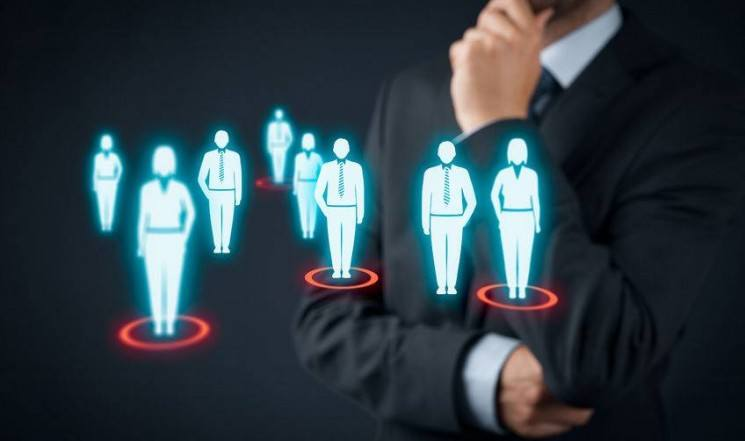
---








# **PREPARANDO EL ENTORNO DE TRABAJO**

In [235]:
# Conectando con Goolge Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
# Instalacion de Librerias Principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# **OBTENCION DE LOS DATOS**

In [237]:
# Lectura del archivo csv alojado en el drive
datos = pd.read_csv("/content/drive/MyDrive/media prediction and its cost.csv")
df = pd.DataFrame(datos)

In [238]:
# caracteristicas del DataFrame
df.shape

(60428, 40)

In [239]:
df.sample(3)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
8405,Candy,Snacks,Food,7.95,3.5775,3.0,Big Time Savings,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio, TV",120.67
48253,Pizza,Frozen Foods,Food,13.80,4.5540,4.0,Super Duper Savers,USA,S,M,...,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Cash Register Handout,129.50
18434,Snack Foods,Snack Foods,Food,15.12,5.1408,4.0,Fantastic Discounts,USA,S,M,...,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,Radio,137.46


In [240]:
# Listado de columnas categoricas
df.select_dtypes(include=['object']).head(3)

,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,Breakfast Foods,Frozen Foods,Food,Bag Stuffers,USA,M,F,Partial High School,Normal,Skilled Manual,Y,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,M,Bachelors Degree,Silver,Professional,Y,$50K - $70K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,Breakfast Foods,Frozen Foods,Food,High Roller Savings,USA,S,F,Partial High School,Normal,Manual,N,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"


In [241]:
# Listado de columnas categoricas
df.select_dtypes(include=['float']).head(3)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16


In [242]:
# Diccionario con las nuevas columnas en español
Colunmas_nuevas = {
    'food_category': 'categoria_alimento','food_department': 'departamento','food_family': 'tipo', 'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)', 'unit_sales(in millions)': 'ventas_unitarias(en millones)', 'promotion_name': 'promocion','sales_country': 'pais',
    'marital_status': 'estado_civil','gender': 'genero','total_children': 'total_de_hijos','education': 'escolaridad','member_card': 'miembro','occupation': 'ocupacion',
    'houseowner': 'vivienda_propia','avg_cars_at home(approx)': 'promedio_autos(aprox)','avg. yearly_income': 'ingreso_anual','num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)','brand_name': 'marca','SRP': 'precio_recomendado','gross_weight': 'peso_bruto','net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable','low_fat': 'bajo_en_grasa','units_per_case': 'unidades_por_caja', 'store_type': 'comercio','store_city': 'ciudad',
    'store_state': 'estado','store_sqft': 'pies_cuadrados_tienda','grocery_sqft': 'pies_cuadrados_comestibles','frozen_sqft': 'pies_cuadrados_congelados','meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria','video_store': 'tienda_de_videos','salad_bar': 'barra_de_ensaladas', 'prepared_food': 'comida_preparada', 'florist': 'floristeria', 'media_type': 'divulgacion','cost': 'costo'
}

In [243]:
# Cambiando nombres de las columnas
df.rename(columns=Colunmas_nuevas, inplace=True)

In [244]:
df.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16


In [245]:
# Diccionarios de las columnas categoricas

categoria_alimento = {'Vegetables': 'Vegetales','Snack Foods': 'Alimentos para picar','Dairy': 'Productos lácteos','Meat': 'Carne','Fruit': 'Fruta','Jams and Jellies': 'Mermeladas y jaleas',
            'Baking Goods': 'Productos para hornear','Breakfast Foods': 'Alimentos para el desayuno','Bread': 'Pan','Canned Soup': 'Sopa enlatada','Beer and Wine': 'Cerveza y vino',
            'Paper Products': 'Productos de papel','Bathroom Products': 'Productos de baño','Electrical': 'Eléctrico','Candy': 'Dulces','Frozen Desserts': 'Postres congelados',
            'Specialty': 'Especialidades','Starchy Foods': 'Alimentos ricos en almidón','Magazines': 'Revistas','Kitchen Products': 'Productos de cocina','Eggs': 'Huevos',
            'Hot Beverages': 'Bebidas calientes','Hygiene': 'Higiene','Pain Relievers': 'Analgésicos','Pizza': 'Pizza','Carbonated Beverages': 'Bebidas carbonatadas',
            'Pure Juice Beverages': 'Bebidas de jugo puro','Cleaning Supplies': 'Suministros de limpieza','Side Dishes': 'Acompañamientos','Frozen Entrees': 'Platos preparados congelados',
            'Drinks': 'Bebidas','Plastic Products': 'Productos de plástico','Hardware': 'Artículos de ferretería','Cold Remedies': 'Remedios para el resfriado','Decongestants': 'Descongestionantes','Canned Tuna': 'Atún enlatado',
            'Seafood': 'Mariscos','Canned Anchovies': 'Anchoas enlatadas','Canned Clams': 'Almejas enlatadas','Candles': 'Velas','Miscellaneous': 'Misceláneos',
            'Canned Oysters': 'Ostras enlatadas','Canned Shrimp': 'Camarones enlatados','Packaged Vegetables': 'Vegetales envasados','Canned Sardines': 'Sardinas enlatadas'}
departamento = {'Produce': 'Productos frescos','Snack Foods': 'Alimentos para picar','Household': 'Artículos para el hogar','Frozen Foods': 'Alimentos congelados',
            'Baking Goods': 'Productos para hornear','Canned Foods': 'Alimentos enlatados','Dairy': 'Productos lácteos','Health and Hygiene': 'Salud e higiene',
            'Beverages': 'Bebidas','Deli': 'Charcutería','Baked Goods': 'Productos horneados','Alcoholic Beverages': 'Bebidas alcohólicas','Snacks': 'Snacks',
            'Starchy Foods': 'Alimentos ricos en almidón','Periodicals': 'Publicaciones periódicas','Eggs': 'Huevos','Breakfast Foods': 'Alimentos para el desayuno',
            'Canned Products': 'Productos enlatados','Checkout': 'Caja de salida','Meat': 'Carne','Seafood': 'Mariscos','Carousel': 'Carrusel'}

tipo = {'Food':'Comida','Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {'Weekend Markdown': 'Descuento de fin de semana','Two Day Sale': 'Venta de dos días','Price Savers': 'Ahorro de precios','Price Winners': 'Ganadores de precios',
            'Save-It Sale': 'Venta Ahorra Ya','Super Duper Savers': 'Super Ahorradores','Super Savers': 'Super Ahorro','One Day Sale': 'Venta de un día','Double Down Sale': 'Venta Doble',
            'High Roller Savings': 'Ahorro para apostadores grandes','Green Light Days': 'Días de luz verde','Shelf Clearing Days': 'Días de liquidación de estanterías',
            'Price Slashers': 'Rebajadores de precios','Free For All': 'Gratis para todos','Cash Register Lottery': 'Lotería de la caja registradora','Go For It': 'Adelante',
            'Two for One': 'Dos por uno','Money Savers': 'Ahorradores de dinero','Big Time Discounts': 'Descuentos de gran magnitud','Price Destroyers': 'Destructores de precios',
            'Saving Days': 'Días de ahorro','Dollar Cutters': 'Recortadores de dólares','Unbeatable Price Savers': 'Ahorro de precios imbatible','Sales Galore': 'Promociones por montones',
            'Big Promo': 'Gran promoción','Dimes Off': 'Más barato','Sales Days': 'Días de venta','Price Cutters': 'Rebajando precios','You Save Days': 'Días de ahorro',
            'Savings Galore': 'Ahorros por montones','Bag Stuffers': 'Bolsas llenas','Three for One': 'Tres por uno','I Cant Believe It Sale': 'Venta No Puedo Creerlo',
            'Sale Winners': 'Ganadores de ventas','Pick Your Savings': 'Elige tus ahorros','Bye Bye Baby': 'Adiós bebé','Best Savings': 'Mejores ahorros','Tip Top Savings': 'Ahorro de primera clase',
            'Shelf Emptiers': 'Estantes vacíos','Big Time Savings': 'Ahorro Enorme','Wallet Savers': 'Ahorradores de billetera','Dollar Days': 'Días de dólar','Mystery Sale': 'Venta misteriosa',
            'Price Smashers': 'Aplastadores de precios','Green Light Special': 'Especial luz verde','Coupon Spectacular': 'Espectacular de cupones',
            'Super Wallet Savers': 'Super ahorradores de billetera','Double Your Savings': 'Duplica tus ahorros','Fantastic Discounts': 'Descuentos fantásticos'}

escolaridad = {'Partial High School':'Primaria', 'High School Degree':'Secundaria', 'Bachelors Degree':'Superior', 'Partial College':'Técnico', 'Graduate Degree':'Maestría'}

miembro = {'Bronze':'Bronce', 'Golden': 'Oro', 'Silver':'Plata'}

ocupacion = {'Professional':'Profesional', 'Skilled Manual':'Técnico', 'Manual':'Obrero', 'Management':'Gestión', 'Clerical':'Cargo de Oficina'}

pais = {'USA':'Estados Unidos', 'Mexico':'México', 'Canada':'Canadá'}

estado_civil = {'S':'Soltero', 'M':'Casado'}

genero = {'F':'Femenino', 'M':'Masculino'}

vivienda_propia = {'Y':'Sí', 'N':'No'}

ingreso_anual = {'$30K - $50K':40000, '$10K - $30K':20000, '$50K - $70K':60000, '$70K - $90K':80000, '$130K - $150K':140000, '$90K - $110K':100000, '$110K - $130K':120000, '$150K +':160000}

comercio = {'Supermarket': 'Supermercado','Deluxe Supermarket': 'Supermercado de lujo','Gourmet Supermarket': 'Supermercado gourmet','Mid-Size Grocery': 'Supermercado mediano','Small Grocery': 'Pequeño supermercado'}

divulgacion = {'Daily Paper, Radio': 'Periódico diario, radio','Product Attachment': 'Anexo del producto','Daily Paper, Radio, TV': 'Periódico diario, radio, televisión','Daily Paper': 'Periódico diario',
              'Street Handout': 'Panfletos','Radio': 'Radio','Sunday Paper': 'Periódico dominical','In-Store Coupon': 'Cupón en la tienda','Sunday Paper, Radio': 'Periódico dominical, radio',
              'Cash Register Handout': 'Entrega en el punto de venta','TV': 'Televisión','Bulk Mail': 'Correo masivo','Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'}


In [246]:
# Mapeo valores de las columnas 'categoricas'
df['categoria_alimento'] = df['categoria_alimento'].map(categoria_alimento)
df['departamento'] = df['departamento'].map(departamento)
df['tipo'] = df['tipo'].map(tipo)
df['promocion'] = df['promocion'].map(promocion)
df['escolaridad'] = df['escolaridad'].map(escolaridad)
df['miembro'] = df['miembro'].map(miembro)
df['ocupacion'] = df['ocupacion'].map(ocupacion)
df['pais'] = df['pais'].map(pais)
df['estado_civil'] = df['estado_civil'].map(estado_civil)
df['genero'] = df['genero'].map(genero)
df['vivienda_propia'] = df['vivienda_propia'].map(vivienda_propia)
df['ingreso_anual'] = df['ingreso_anual'].map(ingreso_anual)
df['comercio'] = df['comercio'].map(comercio)
df['divulgacion'] = df['divulgacion'].map(divulgacion)

In [247]:
df.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

In [249]:
df.ingreso_anual.value_counts()

ingreso_anual
40000     19514
20000     12959
60000     10493
80000      7544
140000     3410
100000     2737
120000     2590
160000     1181
Name: count, dtype: int64

In [250]:
import random
forty = random.sample(range(30000,50000),19514)
Twenty = random.sample(range(10000,30000),12959)
sixty = random.sample(range(50000,70000),10493)
eigth = random.sample(range(70000,90000),7544)
hundredforty = random.sample(range(130000,150000),3410)
hundred = random.sample(range(90000,110000),2737)
hundredtwenty = random.sample(range(110000,130000),2590)
hundredplus = random.sample(range(150000,300000),1181)

In [251]:
numeros = Twenty+forty+sixty+eigth+hundred+hundredtwenty+hundredforty+hundredplus
len(numeros)

60428

In [252]:
df = df.sort_values("ingreso_anual")
df["ingreso_real"] = numeros
df [["ingreso_anual","ingreso_real"]][53300:53325]

,ingreso_anual,ingreso_real
30357,120000,124985
32184,120000,119732
20845,120000,115874
38171,120000,122005
32156,120000,115487
4782,120000,125194
59311,120000,125726
59940,120000,114013
37822,120000,128214
7008,120000,121019


In [253]:
# Exportando el DataFrame traduciso a un archivo CSV
df.to_csv('mi_dataframe.csv', index=False)

# Guardado del DataFrame en Google Drive
df.to_csv('/content/drive/My Drive/mi_dataframe.csv', index=False)

# **EXPLORACION DE DATOS Y PREPROCESAMIENTO**

## **Distribuicion de Ventas por Categoria**

In [254]:
# Funcion de Exploracion de datos
def plot_Ventas (pais,datos):
  plt.figure(figsize=(10,4))
  grafico = sb.countplot(x=pais,data=df,orient="h")
  grafico.set_ylabel("Cant_Ventas",fontsize=16)

  sizes = []
  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/1.6, height+200, f"{round(height/len(datos)*100,2)}%",ha="center",va="bottom", fontsize=12)

  grafico.set_ylim(0,max(sizes)*1.1)


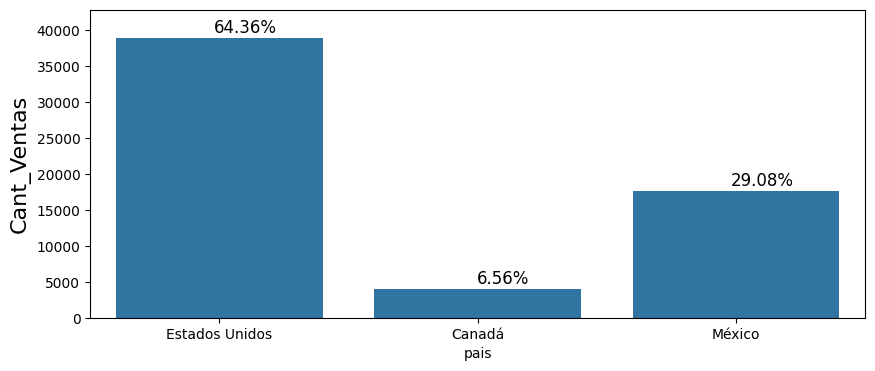

In [255]:
plot_Ventas("pais",df)
### Existe Una dominancia en las ventas del Pais Estados Unidos con un 64.36% de las ventas en Tiendas seguido por
### el 29.8% de Mexico y un 6.56% de Canada

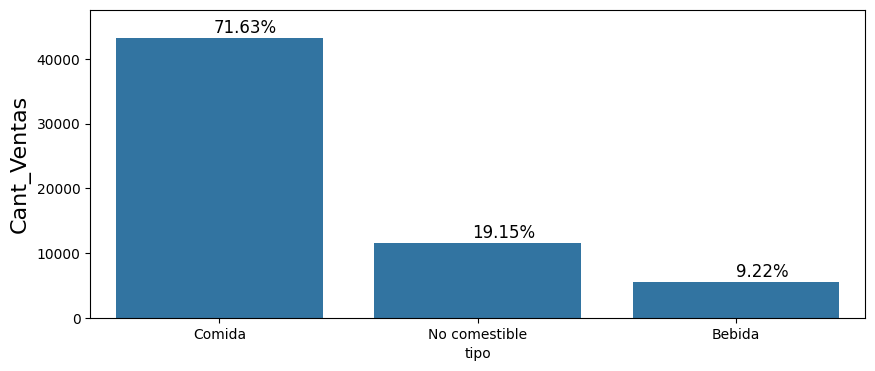

In [256]:
plot_Ventas("tipo",df)
### Existe Una dominancia en ventas por Tipo de producto en Comida con un con un 71.63%
### seguido por el 19.15% de no comestibles y tan solo un 9.22% en Bebidas

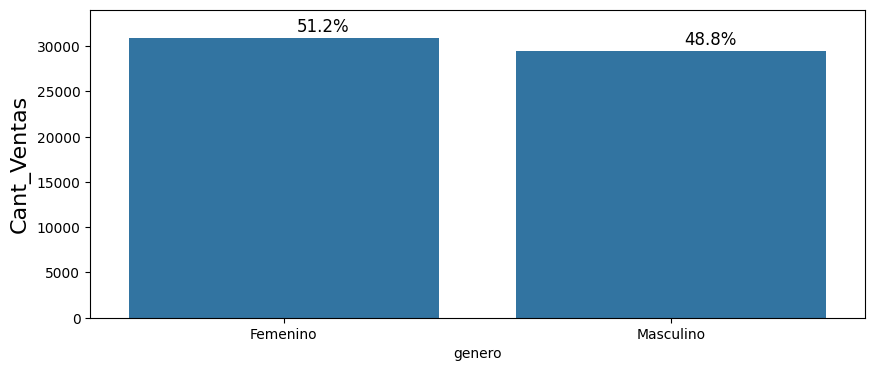

In [257]:
plot_Ventas("genero",df)
### Se observa un Equilibrio en las Ventas por Genero con un 51.2% para el genero Femenino y un 48.8% para el Masculino

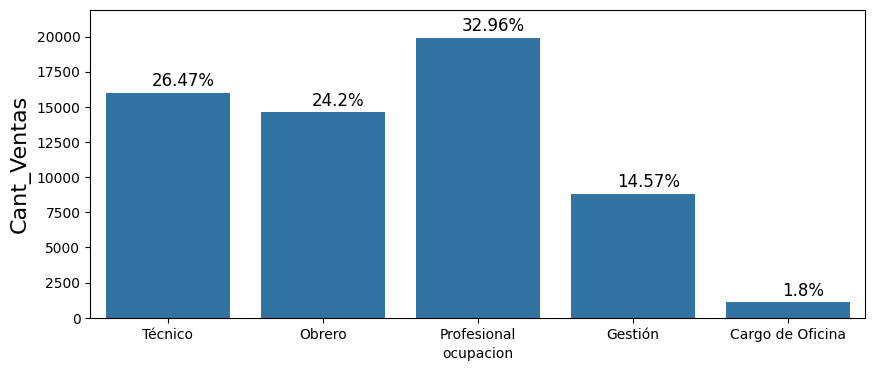

In [258]:
plot_Ventas("ocupacion",df)
## Existe notable distribucion en la ventas por ocupacion donde el mayor porcentaje corresponde a las personas profesionales,
## con el 32.96% que probablemente perciban mejores ingresos, seguido por un 26.47% para personal tecnico y un 24,2% para
## obreros que probablemente corresponda a un volumen mas alto de personas y un 16.3% para personal de Gestion y oficina

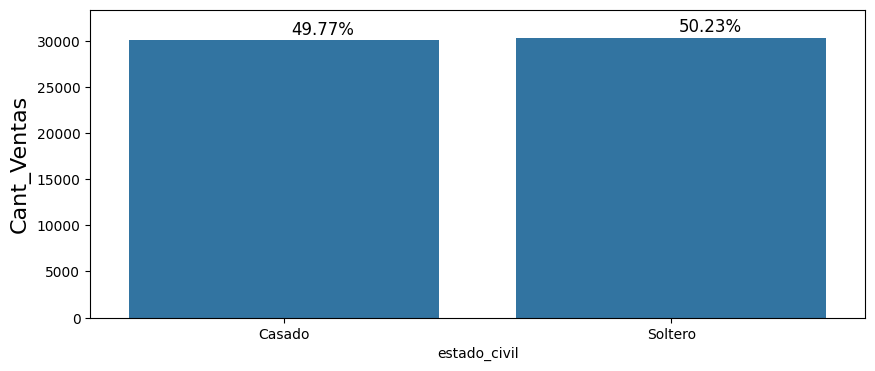

In [259]:
plot_Ventas("estado_civil",df)
### Se observa Equilibrio en Ventas por Estado civil con un 49.77% para Casados y un 50.23% para personas Solteras

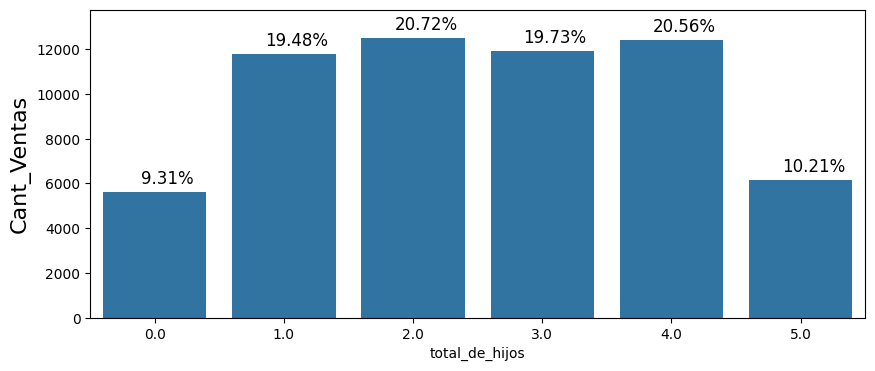

In [260]:
plot_Ventas("total_de_hijos",df)
## Se Observa una notable reduccion en las ventas para personas sin Hijos con solo un 9.31% de las ventas en tienda
## y un particular porcentaje para personas con 5 hijos de tan solo el 10.21% de las ventas que probablemente corresponda
## a personas de un bajo nivel socioeconomico entre otras razones

## **Distribucion de Ingresos por Categoria**

In [261]:
# Definiendo la funcion del Histograma
def histograma_var(df, ventas_col, categorical_var):

    # Crear la figura
    plt.figure(figsize=(9, 4))

    # Crear el histograma desglosado por la variable categórica
    sb.histplot(data=df, x=ventas_col, hue=categorical_var, multiple='stack',bins=10)
    plt.title(f'Distribución de Ingresos {categorical_var.capitalize()}')
    plt.xlabel('ingresos_anuales')
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.show()


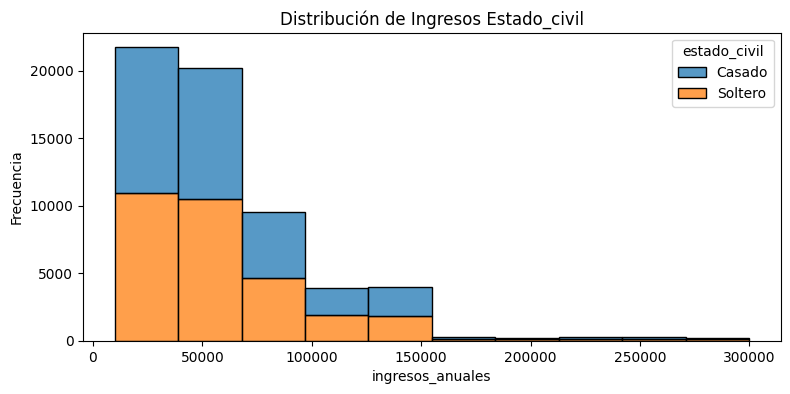

In [262]:
# Histograma de Ingresos por estado civil
histograma_var(df, 'ingreso_real', 'estado_civil')
## La distribucion de los Ingresos por Estado civil Muestra a las personas Casadas percibiendo una mayor cantidad de
## ingresos que las personas solteras para los distintos rangos salariales del Dataframe

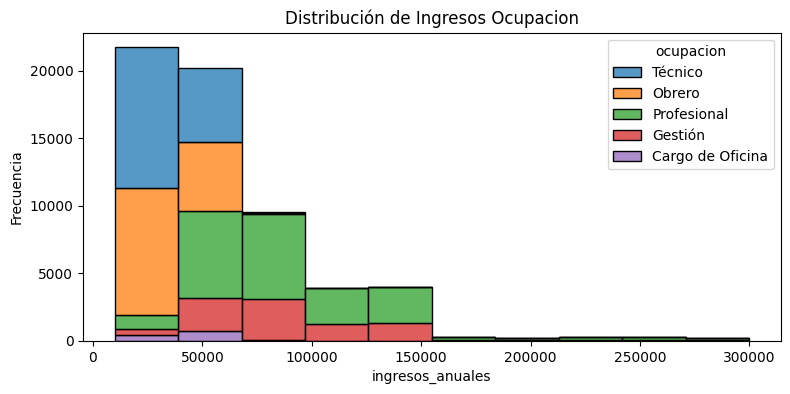

In [263]:
# Histograma de Ingresos por ocupacion
histograma_var(df, 'ingreso_real', 'ocupacion')
## Los Ingresos por Ocupacion Muestra a los Tecnicos y Obreros con una mayor frecuencia de compra pero con rangos salariales
## mucho mas bajos que los profesionales y el personal de Gestion que pueden llegar hasta los 150 mil o mas por año

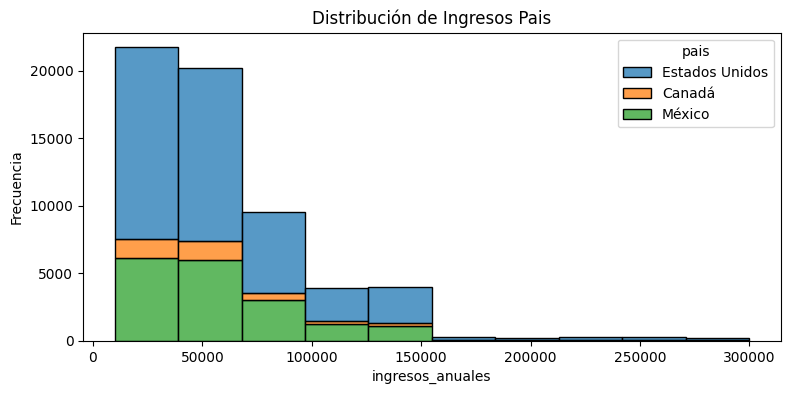

In [264]:
# Histograma de Ingresos por pais
histograma_var(df, 'ingreso_real', 'pais')
## Los Ingresos por pais indican que Estados Unidos posee una alta frecuencia de personas y de rango salarial mayor
## Seguidos por Canada y Mexico con una frecuencia notablemente mas baja.

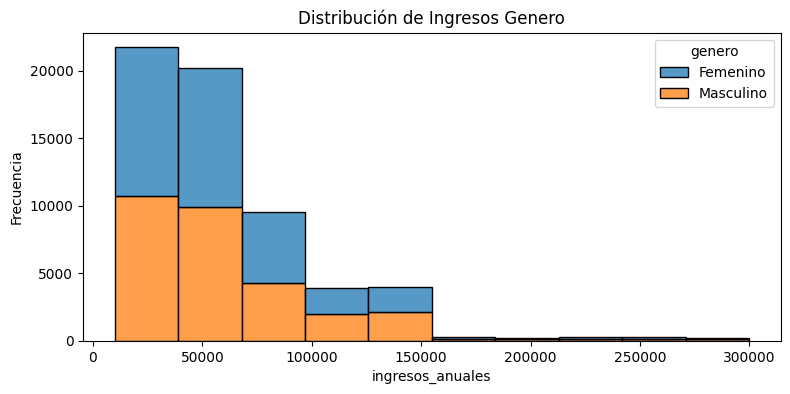

In [265]:
# Histograma de Ingresos por genero
histograma_var(df, 'ingreso_real', 'genero')
## Los Ingresos por genero no enseña Un DataFrame con una alta frecuencia del genero femenino en tiendas y con
## rango salarial notablemente mayor que la del genero masculino.

# **DEFINICION DE VARIABLES Y ESTANDARIZACION DE DATOS**

## **Definicion de las variables de Clasificacion**

In [266]:
## VARIABLES PARA EL ANALISIS (Pais, escolaridad, ocupacion, estado_civil, genero, tipo ,numero_de_hijos, miembro,ingreso_real,ventas_tienda(en millones))

In [267]:
datos = df[["pais","estado_civil","numero_hijos","miembro","ingreso_real"]]
datos.head(5)

,pais,estado_civil,numero_hijos,miembro,ingreso_real
0,Estados Unidos,Casado,1.0,NaN,11264
26845,Canadá,Soltero,0.0,NaN,22616
26840,Canadá,Soltero,0.0,NaN,26480
26838,Canadá,Casado,1.0,NaN,20805
26837,Canadá,Soltero,0.0,NaN,12866


In [268]:
datos_nuevos = datos.loc[-datos.miembro.isna()]
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46561 entries, 26789 to 59091
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pais          46561 non-null  object 
 1   estado_civil  46561 non-null  object 
 2   numero_hijos  46561 non-null  float64
 3   miembro       46561 non-null  object 
 4   ingreso_real  46561 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [269]:
datos_nuevos.head()

,pais,estado_civil,numero_hijos,miembro,ingreso_real
26789,Canadá,Soltero,0.0,Plata,28262
26892,Estados Unidos,Casado,1.0,Oro,22501
26717,México,Soltero,0.0,Bronce,11881
26710,México,Casado,0.0,Plata,23847
26694,México,Soltero,0.0,Bronce,29889



## **Estandarizacion de los Datos**

In [270]:
# Conversion de variables categoricas en numericas con la funcion pd.get_dummies

datos_nuevos_std = pd.get_dummies(datos_nuevos)


In [271]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

scaler = StandardScaler()
X_std = scaler.fit_transform(datos_nuevos_std)

In [272]:
## Dataframe datos estandarizados

df_std = pd.DataFrame(X_std, columns=datos_nuevos_std.columns)
df_std.head(3)

,numero_hijos,ingreso_real,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil_Casado,estado_civil_Soltero,miembro_Bronce,miembro_Oro,miembro_Plata
0,-0.651027,-1.011190,3.750121,-1.323445,-0.650061,-0.999979,0.999979,-1.628096,-0.440135,2.820901
1,0.111666,-1.152935,-0.266658,0.755604,-0.650061,1.000021,-1.000021,-1.628096,2.272031,-0.354497
2,-0.651027,-1.414232,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497


# **EVALUACION DE CLUSTER**

## **Cantidad optima de clusters**

In [273]:
## Calculo de la Regla del Codo
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  Kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10)
  Kmeans.fit(df_std)
  wcss.append(Kmeans.inertia_)

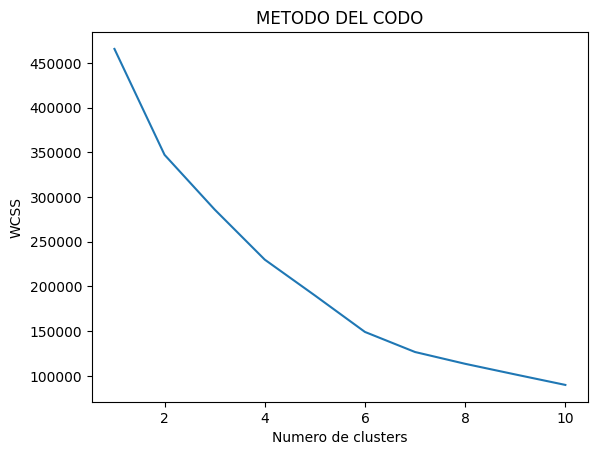

In [274]:
## Visualizacion Regla del Codo para # de Cluster
plt.plot(range(1,11), wcss)
plt.title('METODO DEL CODO')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [275]:
# Calculo de los cluster
clustering = KMeans(n_clusters=7, n_init = 10, max_iter=300,random_state=42)
clustering.fit_predict(df_std)
labels = clustering.labels_

In [276]:
from sklearn import metrics

## Metrica Distancia Euclidiana o Silhouette
silhouette = metrics.silhouette_score(df_std, labels, metric='euclidean')
print(silhouette)

0.5375981417973393


In [277]:
## Metrica Davies Boudin

dbs = metrics.davies_bouldin_score(X_std, labels)
print(dbs)

0.8589448954870919


In [278]:
## Metrica Calinski-Harabasz

calinski = metrics.calinski_harabasz_score(X_std, labels)
print(calinski)

20762.757251772455


### Variacion del numero de cluster

In [279]:
## Validacion de metricas para el numero de cluster

scores = []
for k in range(2, 11):
  score = {}
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(df_std)
  labels = clustering.labels_
  score ["N_clusters"] = k
  score["silhouette"] = metrics.silhouette_score(df_std, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(df_std, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(df_std, labels)
  scores.append(score)
table_Vd = pd.DataFrame(scores)
table_Vd

,N_clusters,silhouette,Davies Boudin,Calinski-Harabasz
0,2,0.302554,1.568864,15883.152171
1,3,0.331925,1.417124,14617.108092
2,4,0.377533,1.176367,15844.193119
3,5,0.434622,1.010901,16893.215871
4,6,0.478746,0.916236,19764.394510
5,7,0.537603,0.858952,20762.758476
6,8,0.555010,0.871288,20359.161977
7,9,0.581714,0.888694,20853.077669
8,10,0.598112,0.862024,21627.540200


### Evaluacion de La estructura de los Clusters

In [280]:
## Validacion de metricas para el numero de cluster con Aleotoriedad
random_data = np.random.rand(46561, 10)

scores = []
for k in range(2, 11):
  score = {}
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(random_data)
  labels = clustering.labels_
  score ["N_clusters"] = k
  score["silhouette"] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(random_data, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)
random_table = pd.DataFrame(scores)
random_table

,N_clusters,silhouette,Davies Boudin,Calinski-Harabasz
0,2,0.075021,3.458918,3804.509220
1,3,0.064439,3.087619,3228.878465
2,4,0.064930,3.011763,2910.498712
3,5,0.064615,2.667672,2655.968327
4,6,0.064910,2.531887,2473.881849
5,7,0.065727,2.423995,2335.368788
6,8,0.066139,2.335793,2210.108126
7,9,0.066176,2.258435,2109.760862
8,10,0.067911,2.152693,2032.220238


### Evaluacion de la estabilidad de los Clusters

In [281]:
## Validacion de la Estabilidad del modelo
set1, set2, set3,set4 = np.array_split(df_std, 4)
sets = [set1,set2,set3,set4]

scores = []

for set_ in sets:
  score = {}
  n=1
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(set_)
  labels = clustering.labels_
  score ["Set"] = f"set {n}"
  n+=1
  score["silhouette"] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(set_, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)
estability_table = pd.DataFrame(scores)
estability_table

,Set,silhouette,Davies Boudin,Calinski-Harabasz
0,set 1,0.754691,0.608160,10729.539356
1,set 1,0.744084,0.648055,10436.677795
2,set 1,0.740137,0.681004,10511.553758
3,set 1,0.598627,0.848582,5595.634153


## **Instanciamiento de la mejor estructura de Clusters**

In [282]:
clustering = KMeans(n_clusters=7, n_init = 10, max_iter=300, random_state=42)
clustering.fit_predict(df_std)
labels = clustering.labels_
datos_nuevos['cluster'] = labels
datos_nuevos.head(5)

<ipython-input-282-c57974690eb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_nuevos['cluster'] = labels


,pais,estado_civil,numero_hijos,miembro,ingreso_real,cluster
26789,Canadá,Soltero,0.0,Plata,28262,6
26892,Estados Unidos,Casado,1.0,Oro,22501,1
26717,México,Soltero,0.0,Bronce,11881,2
26710,México,Casado,0.0,Plata,23847,5
26694,México,Soltero,0.0,Bronce,29889,2


# **ANALISIS DE CLUSTERS**

In [283]:
df_std['cluster'] = labels
df_std.head()

,numero_hijos,ingreso_real,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil_Casado,estado_civil_Soltero,miembro_Bronce,miembro_Oro,miembro_Plata,cluster
0,-0.651027,-1.011190,3.750121,-1.323445,-0.650061,-0.999979,0.999979,-1.628096,-0.440135,2.820901,6
1,0.111666,-1.152935,-0.266658,0.755604,-0.650061,1.000021,-1.000021,-1.628096,2.272031,-0.354497,1
2,-0.651027,-1.414232,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497,2
3,-0.651027,-1.119818,-0.266658,-1.323445,1.538318,1.000021,-1.000021,-1.628096,-0.440135,2.820901,5
4,-0.651027,-0.971159,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497,2


In [284]:
df_std.groupby('cluster').describe()

numero_hijos                                                        \
               count      mean           std       min       25%       50%   
cluster                                                                      
0             4266.0  0.206779  7.225312e-01 -0.651027 -0.651027  0.111666   
1             5791.0  1.773101  8.966637e-01 -0.651027  1.637052  1.637052   
2             6316.0 -0.651027  1.110311e-16 -0.651027 -0.651027 -0.651027   
3            13127.0 -0.651027  1.110265e-16 -0.651027 -0.651027 -0.651027   
4             9297.0  0.170650  7.121783e-01 -0.651027 -0.651027  0.111666   
5             4713.0  0.025897  1.096117e+00 -0.651027 -0.651027 -0.651027   
6             3051.0 -0.065821  8.845831e-01 -0.651027 -0.651027 -0.651027   

                            ingreso_real            ... miembro_Oro            \
              75%       max        count      mean  ...         75%       max   
cluster                                             ...                         
0        0.874359  3.162437       4266.0 -0.060341  ...   -0.440135 -0.440135   
1        2.399745  3.162437       5791.0  0.220020  ...    2.272031  2.272031   
2       -0.651027 -0.651027       6316.0 -0.150712  ...   -0.440135  2.272031   
3       -0.651027 -0.651027      13127.0 -0.098779  ...   -0.440135  2.272031   
4        0.874359  3.162437       9297.0 -0.098454  ...   -0.440135 -0.440135   
5        0.111666  3.162437       4713.0  0.481652  ...   -0.440135 -0.440135   
6        0.111666  3.162437       3051.0 -0.040266  ...   -0.440135  2.272031   

        miembro_Plata                                                        \
                count      mean           std       min       25%       50%   
cluster                                                                       
0              4266.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
1              5791.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
2              6316.0 -0.354497  1.110311e-16 -0.354497 -0.354497 -0.354497   
3             13127.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
4              9297.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
5              4713.0  2.820901  0.000000e+00  2.820901  2.820901  2.820901   
6              3051.0  0.150278  1.161252e+00 -0.354497 -0.354497 -0.354497   

                             
              75%       max  
cluster                      
0       -0.354497 -0.354497  
1       -0.354497 -0.354497  
2       -0.354497 -0.354497  
3       -0.354497 -0.354497  
4       -0.354497 -0.354497  
5        2.820901  2.820901  
6       -0.354497  2.820901  

[7 rows x 80 columns]

In [285]:
clustering.cluster_centers_

array([[ 0.20677905, -0.06034135, -0.26665804, -1.32344509,  1.53831832,
         1.00002148, -1.00002148,  0.61421425, -0.44013493, -0.35449664],
       [ 1.77310099,  0.22002012, -0.23891306,  0.04547444,  0.08229628,
         1.00002148, -1.00002148, -1.62809638,  2.27203055, -0.35449664],
       [-0.65102693, -0.15071158, -0.26665804, -1.32344509,  1.53831832,
        -0.99997852,  0.99997852,  0.44593445, -0.23659369, -0.35449664],
       [-0.65102693, -0.09877892, -0.26665804,  0.75560369, -0.65006052,
        -0.99997852,  0.99997852,  0.45723372, -0.25026062, -0.35449664],
       [ 0.17065013, -0.09845426, -0.26665804,  0.75560369, -0.65006052,
         1.00002148, -1.00002148,  0.61421425, -0.44013493, -0.35449664],
       [ 0.02589737,  0.48165211, -0.26665804,  0.1772814 , -0.04132624,
        -0.00655607,  0.00655607, -1.62809638, -0.44013493,  2.82090121],
       [-0.06582078, -0.04026624,  3.75012132, -1.32344509, -0.65006052,
         0.03902508, -0.03902508, -0.01563177

In [286]:
# prompt: Genera un dataFrame llamado c
columnas_df_std = df_std.columns.tolist()
columnas_df_std.remove('cluster')
centroides = pd.DataFrame(clustering.cluster_centers_, columns=columnas_df_std)
round(centroides.var(),3).sort_values(ascending=False)

pais_Canadá             2.300
miembro_Plata           1.401
miembro_Bronce          1.046
miembro_Oro             0.976
pais_México             0.969
pais_Estados Unidos     0.953
estado_civil_Casado     0.808
estado_civil_Soltero    0.808
numero_hijos            0.663
ingreso_real            0.053
dtype: float64

In [287]:
# Analisis de componentes principales

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_std)
pca_df_std = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])
pca_CP = pd.concat([pca_df_std, df_std['cluster']], axis=1).sort_values("cluster")

pca_CP.head()


,PC1,PC2,cluster
14774,3.501882,-0.677732,0
13792,3.312294,-1.010236,0
36649,3.496961,-0.625014,0
13797,3.502078,-0.679840,0
13798,3.502576,-0.685176,0


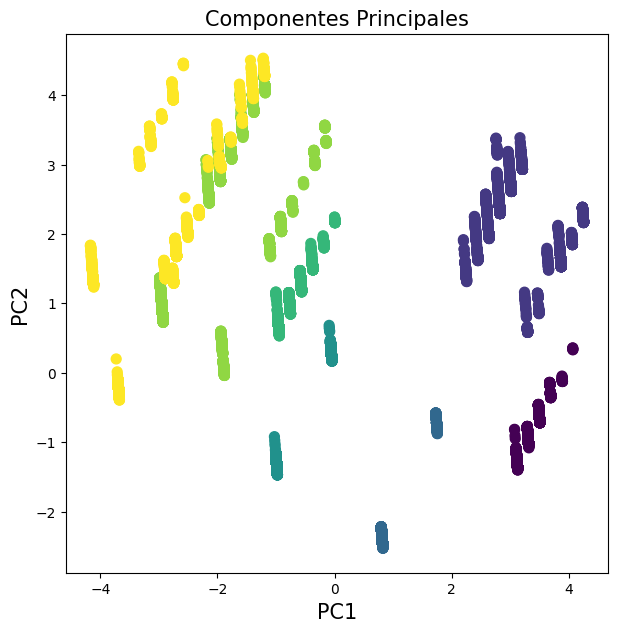

In [288]:
# Grafico de Componenetes principales

# Creacion de Grafico

plt.figure(figsize=(7, 7))
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Componentes Principales',fontsize=15)
plt.scatter(x=pca_CP.PC1, y=pca_CP.PC2, c=pca_CP.cluster, s=50, cmap='viridis')

plt.show()

# **ANALISIS DE RESULTADOS DE LA CLUSTERIZACION**

In [289]:
# Función para analizar clústers
def analizar_cluster(datos, id_cluster):

    # Cuenta la distribución del estado civil por cluster
    cant_estado_civil = datos_nuevos.query(f"cluster == {id_cluster}")["estado_civil"].value_counts().idxmax()

    # Calcula de las ventas promedio por cluster
    cant_pais = round(datos_nuevos.query(f"cluster == {id_cluster}")["pais"].value_counts()).idxmax()

    # Calcula el promedio de hijos por cluster
    prom_hijos = round(datos_nuevos.query(f"cluster == {id_cluster}")["numero_hijos"].mean())

    # Cuenta la distribución de miembros por cluster
    cant_miembro = datos_nuevos.query(f"cluster == {id_cluster}")["miembro"].value_counts().idxmax()

    # Calcula el promedio de ingresos por cluster
    prom_ingresos = round(datos_nuevos.query(f"cluster == {id_cluster}")["ingreso_real"].mean())

    # impresion de resultados
    print(f"ANALISIS DE CLUSTER ({id_cluster}):\nSegmento de clientes con estado civil {cant_estado_civil} que compra en {cant_pais}, con un promedio de {prom_hijos} hijos.\nCatalogado como {cant_miembro} y con un promedio de ingresos de {prom_ingresos} dólares al año.")

In [290]:
analizar_cluster(datos_nuevos, 0)

ANALISIS DE CLUSTER (0):
Segmento de clientes con estado civil Casado que compra en México, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 66908 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (0):** Un programa de lealtad podría ser efectivo con este grupo; ofreciendo puntos por cada compra
que puedan canjear por productos o descuentos en el futuro, para incentivarlos y moverlos a la Categoria Plata dado que
poseen un promedio de ingresos aceptable y son personas casadas con al menos 1 hijo y pudieramos incluirle descuentos en
productos para niños o paquetes familiares

In [291]:
analizar_cluster(datos_nuevos, 1)

ANALISIS DE CLUSTER (1):
Segmento de clientes con estado civil Casado que compra en Estados Unidos, con un promedio de 3 hijos.
Catalogado como Oro y con un promedio de ingresos de 78303 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (1):** Dado que estos clientes corresponcen con familias numerosas con un promedio de 3 hijos podriamos enfocarnos en **Promociones Familiares** con productos Premium ya que poseen el segundo mejor nivel de ingresos de 78.600 dolares al Año puesto que viven en Estados Unidos y son catalogados como clientes Oro, asi que es importante que dichas promociones de marketing se realicen en Idioma Ingles.

In [292]:
analizar_cluster(datos_nuevos, 2)

ANALISIS DE CLUSTER (2):
Segmento de clientes con estado civil Soltero que compra en México, con un promedio de 0 hijos.
Catalogado como Bronce y con un promedio de ingresos de 63235 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (2):** Esta Estrategia podriamos llamarla **"Soltero Bronce Mexico"** dadas sus caracteristicas, donde trataremos de acercarlos a ofertas y promociones con productos de Valor de buena relacion calidad-precio puesto que su promedio salarial es de $63.235 y su Categoria es Bronce la cual se pretende mejorar a Plata a partir de estas promociones y descuentos.

In [293]:
analizar_cluster(datos_nuevos, 3)

ANALISIS DE CLUSTER (3):
Segmento de clientes con estado civil Soltero que compra en Estados Unidos, con un promedio de 0 hijos.
Catalogado como Bronce y con un promedio de ingresos de 65346 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (3):** Esta estrategia llamada **"Soltero Bronce EEUU"** se enfoca tambien en productos de buena relacion calidad-precio dado que es un segmento que compra en Mexico y con un promedio salarial bajo de tan solo 65.346 dolares, por lo que para poder transmitir de forma efectiva estas ofertas y promociones debe hacerse en idioma Español y atraves de una buena estrategia de Social media Marketing.

In [297]:
analizar_cluster(datos_nuevos, 4)

ANALISIS DE CLUSTER (4):
Segmento de clientes con estado civil Casado que compra en Estados Unidos, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 65359 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (4):** La estrategia del cluster 4 la llamaremos **"Casado Bronce USA"** y estara enfocada en Fidelizar estos clientes Bronce que compran en los Estados Unidos , pero que no tienen un promedio de Ingresos tan alto , pero que si poseen al menos un hijo acercandolos a ofertas y promociones en Idioma Ingles que ofrezcan tambien puntos de lealtad por cada compra y que puedan canjearlos por productos o descuentos en el futuro, incentivandolos a realizar mas compras para acercarlos a una Categoria Plata u Oro.

In [295]:
analizar_cluster(datos_nuevos, 5)

ANALISIS DE CLUSTER (5):
Segmento de clientes con estado civil Soltero que compra en Estados Unidos, con un promedio de 1 hijos.
Catalogado como Plata y con un promedio de ingresos de 88936 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (5):** La estrategia se llamara **"Plata Solitario con Hijos"** y priorizara las ofertas de productos premium ya que poseen el promedio salarial mas alto con $89.936 dolares al año. Estos clientes podrian recibir ofertas especiales y tarjetas de regalo para incentivarlos a gastar más y potencialmente moverlos a la categoría Oro a partir de publicidad y promocion en Ingles dado que compran en los Estados Unidos.

In [298]:
analizar_cluster(datos_nuevos, 6)

ANALISIS DE CLUSTER (6):
Segmento de clientes con estado civil Casado que compra en Canadá, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 67724 dólares al año.


**ESTRATEGIA DE MARKETING GRUPO (6):** La estrategia del segmento 6 llamada **"Familia Bronce Canadiense"** se enfocara en Publicidad y ofertas que puedan ser transmitidas en Idioma Ingles y Frances dada la diversidad de idioma en el Pais de compra y promocionando paquetes familiares y productos para niños con una buena relacion calidad-precio ya que el promedio salarial se ubica en un rango medio llegando apenas a los $67.724 al año.